# `Hotel Reservations Dataset Project`

# 1.PROBLEM DEFINITION
The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

> Can you predict if the customer is going to honor the reservation or cancel it ?

# 2.DATA
The data used in this project was loaded from this site: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset
        

# 3.EVALUATION 
Accuracy was the main mode of evaluation in this project,but there were other evaluation used in this project.

# 4. FEATURE
About the dataset used;
The file contains the different attributes of customers' reservation details. The detailed data dictionary is given below.

Data Dictionary

1. **Booking_ID**: unique identifier of each booking
2. **no_of_adults**: Number of adults
3. **no_of_children**: Number of Children
4. **no_of_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
5. **no_of_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
6. **type_of_meal_plan**: Type of meal plan booked by the customer:
7. **required_car_parking_space**: Does the customer require a car parking space? (0 - No, 1- Yes)
8. **room_type_reserved**: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
9. **lead_time**: Number of days between the date of booking and the arrival date
10. **arrival_year**: Year of arrival date
11. **arrival_month**: Month of arrival date
12. **arrival_date**: Date of the month
13. **market_segment_type**: Market segment designation.
14. **repeated_guest**: Is the customer a repeated guest? (0 - No, 1- Yes)
15. **no_of_previous_cancellations**: Number of previous bookings that were canceled by the customer prior to the current            booking
16. **no_of_previous_bookings_not_canceled**: Number of previous bookings not canceled by the customer prior to the current          booking
17. **avg_price_per_room**: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
18. **no_of_special_requests**: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
19. **booking_status**: Flag indicating if the booking was canceled or not.

# Preparing the tools
* `pandas` for data analysis.
* `NumPy` for numerical operations.
* `Matplotlib/seaborn` for plotting or data visualization.
* `Scikit-Learn` for machine learning modelling and evaluation.

In [1]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [2]:
df = pd.read_csv("Hotel Reservations.csv") 
df.shape # (rows, columns)

(36275, 19)

## Data Exploration

In [3]:
# top 5 rows of our dataframe
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [4]:
#how many value count for booking_status
df.booking_status.value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [5]:
# Normalized value counts
df.booking_status.value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

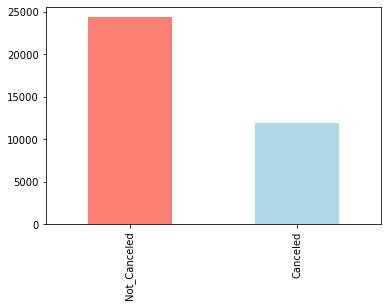

In [6]:
# Plot the value counts with a bar graph
df.booking_status.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [7]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['booking_status']= label_encoder.fit_transform(df['booking_status'])
  
df['booking_status'].unique()

array([1, 0])

In [8]:
df['booking_status']


0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36275, dtype: int32

In [9]:
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,0
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,1
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,1
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,1
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [11]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

In [12]:
# Check the different values of different columns
df. type_of_meal_plan.value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [13]:
# Check the different values of different columns
df.  room_type_reserved.value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [14]:
 # Check the different values of different columns
df. market_segment_type.value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [15]:
#names of columns
columns = list(df.columns)
columns

['Booking_ID',
 'no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'booking_status']

In [16]:
df.booking_status.head(10)

0    1
1    1
2    0
3    0
4    0
5    0
6    1
7    1
8    1
9    1
Name: booking_status, dtype: int32

In [17]:
# Check for missing values
df_tmp.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [18]:
# checking  columns contain strings
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Booking_ID
type_of_meal_plan
room_type_reserved
market_segment_type


In [19]:
# This will turn all of the string values into category values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [21]:
# Turn categorical variables into numbers
for label, content in df.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df[label] = pd.Categorical(content).codes+1  

In [22]:
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Booking_ID_is_missing,type_of_meal_plan_is_missing,room_type_reserved_is_missing,market_segment_type_is_missing
0,1,2,0,1,2,1,0,1,224,2017,...,0,0,0,65.00,0,1,False,False,False,False
1,2,2,0,2,3,4,0,1,5,2018,...,0,0,0,106.68,1,1,False,False,False,False
2,3,1,0,2,1,1,0,1,1,2018,...,0,0,0,60.00,0,0,False,False,False,False
3,4,2,0,0,2,1,0,1,211,2018,...,0,0,0,100.00,0,0,False,False,False,False
4,5,2,0,1,1,4,0,1,48,2018,...,0,0,0,94.50,0,0,False,False,False,False
5,6,2,0,0,2,2,0,1,346,2018,...,0,0,0,115.00,1,0,False,False,False,False
6,7,2,0,1,3,1,0,1,34,2017,...,0,0,0,107.55,1,1,False,False,False,False
7,8,2,0,1,3,1,0,4,83,2018,...,0,0,0,105.61,1,1,False,False,False,False
8,9,3,0,0,4,1,0,1,121,2018,...,0,0,0,96.90,1,1,False,False,False,False
9,10,2,0,0,5,1,0,4,44,2018,...,0,0,0,133.44,3,1,False,False,False,False


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  int32  
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  int8   
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  int8   
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

# Modeling

# splitting data

In [24]:
# Everything except target variable
X = df.drop("booking_status", axis=1)

# Target variable
y = df.booking_status.values

## Rescaling the data

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
print(scaled_data)

[[-1.73200306  0.29889263 -0.26147045 ...  0.          0.
   0.        ]
 [-1.73190756  0.29889263 -0.26147045 ...  0.          0.
   0.        ]
 [-1.73181207 -1.62897546 -0.26147045 ...  0.          0.
   0.        ]
 ...
 [ 1.73181207  0.29889263 -0.26147045 ...  0.          0.
   0.        ]
 [ 1.73190756  0.29889263 -0.26147045 ...  0.          0.
   0.        ]
 [ 1.73200306  0.29889263 -0.26147045 ...  0.          0.
   0.        ]]


## train and test split

In [26]:
# Random seed for reproducibility
np.random.seed(55)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(scaled_data, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

## Model choices
We'll be using the following and comparing their results.

1. Logistic Regression - LogisticRegression()
2. K-Nearest Neighbors - KNeighboursClassifier()
3. RandomForest - RandomForestClassifier()

In [27]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [28]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.8441075120606478,
 'Logistic Regression': 0.8141971054445211,
 'Random Forest': 0.9029634734665748}

## Model comparison

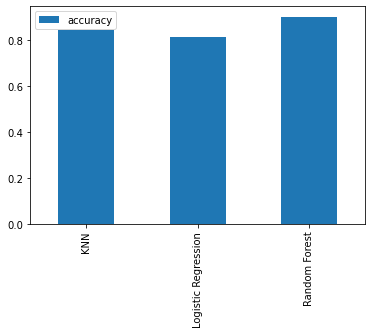

In [29]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

Hyperparameter tuning and cross-validation
Next steps to be taken:

1. Tune model hyperparameters
2. Perform cross-validation
3. Plot ROC curves
4. Make a confusion matrix
5. Get precision, recall and F1-score metrics
6. Find the most important model features

# 1. Tune model hyperparameters
## Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand

In [30]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 84.41%


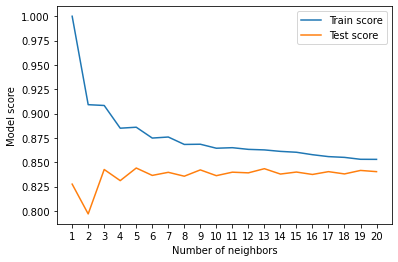

In [31]:
#visualizing the scores
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Tuning models with with RandomizedSearchCV

In [32]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [33]:
# Setup random seed
np.random.seed(78)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 11.288378916846883}

In [35]:
rs_log_reg.score(X_test, y_test)

0.8140592694693315

Now we've tuned `LogisticRegression` using RandomizedSearchCV, we'll do the same for `RandomForestClassifier`

In [36]:
# Setup random seed
np.random.seed(90)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [37]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 360,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_depth': None}

In [38]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.9000689179875948

In [39]:
## Tuning a model with GridSearchCV

In [40]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [41]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 11.288378916846883, 'solver': 'liblinear'}

In [42]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8140592694693315

##Evaluating a classification model
We want:

1. ROC curve and AUC score - plot_roc_curve()
2. Confusion matrix - confusion_matrix()
3. Classification report - classification_report()
4. Precision - precision_score()
5. Recall - recall_score()
6. F1-score - f1_score()

In [43]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)

In [44]:
y_preds

array([1, 1, 1, ..., 1, 1, 0])

In [45]:
## ROC Curve and AUC Scores

C:\Users\OMBATI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


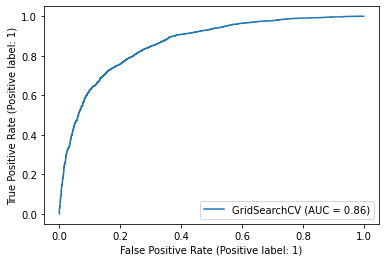

In [46]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [47]:
from sklearn.metrics import roc_auc_score

#roc_auc_score(y_test)

## Confusion matrix

In [48]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[1421  845]
 [ 504 4485]]


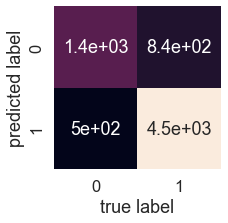

In [49]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [50]:
## Classification report

In [51]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68      2266
           1       0.84      0.90      0.87      4989

    accuracy                           0.81      7255
   macro avg       0.79      0.76      0.77      7255
weighted avg       0.81      0.81      0.81      7255



In [52]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 11.288378916846883, 'solver': 'liblinear'}

In [53]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [54]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.78387319, 0.7827705 , 0.78993797, 0.7931082 , 0.79186768])

In [55]:
cv_acc = np.mean(cv_acc)
cv_acc

0.7883115093039283

In [56]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8076077838824445

In [57]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.899958999589996

In [58]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8511278446081457

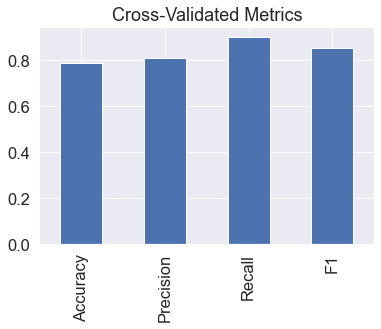

In [59]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

# Feature importance

In [61]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [62]:
# Check coef_
clf.coef_

array([[-0.06011639, -0.01435502, -0.00673347, -0.12434882, -0.07276314,
        -0.09453617,  0.24731358,  0.12874346, -1.1892289 , -0.22336294,
         0.11830268, -0.02469826, -0.77473552,  0.21484392, -0.04862225,
         0.16570728, -0.63372679,  1.07214869,  0.        ,  0.        ,
         0.        ,  0.        ]])

In [63]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'Booking_ID': -0.060116391728576114,
 'no_of_adults': -0.01435502174878482,
 'no_of_children': -0.006733466622970339,
 'no_of_weekend_nights': -0.12434881597108617,
 'no_of_week_nights': -0.07276313974902787,
 'type_of_meal_plan': -0.0945361657820737,
 'required_car_parking_space': 0.24731358262816597,
 'room_type_reserved': 0.12874346056308195,
 'lead_time': -1.1892289012490318,
 'arrival_year': -0.22336294451049743,
 'arrival_month': 0.11830268058275537,
 'arrival_date': -0.02469826128563904,
 'market_segment_type': -0.7747355210521492,
 'repeated_guest': 0.21484391536295575,
 'no_of_previous_cancellations': -0.048622250685436276,
 'no_of_previous_bookings_not_canceled': 0.16570727870871324,
 'avg_price_per_room': -0.6337267906253031,
 'no_of_special_requests': 1.0721486944781526,
 'booking_status': 0.0,
 'Booking_ID_is_missing': 0.0,
 'type_of_meal_plan_is_missing': 0.0,
 'room_type_reserved_is_missing': 0.0}

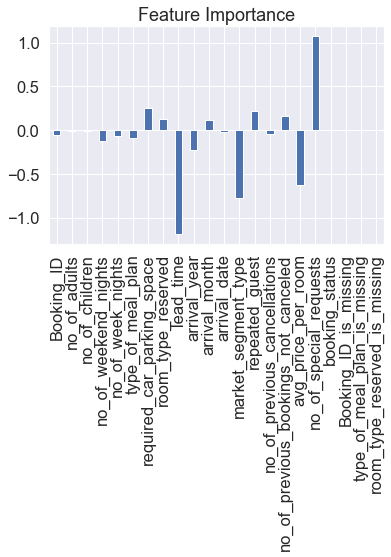

In [64]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);